# Regression and Multivariate Analysis [MA4142]
# Project: Analysis of Weather History Dataset

In [11]:
# import all the necessary libraries here
library(dplyr)
library(NbClust)
library(psych)
library(useful)
library(stats)
library(ggplot2)
library(ggfortify)
library(scatterplot3d)
library(corrplot)

set.seed(0)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Registered S3 methods overwritten by 'ggfortify':
  method         from  
  autoplot.acf   useful
  fortify.acf    useful
  fortify.kmeans useful
  fortify.ts     useful

corrplot 0.92 loaded



### Load Data

In [12]:
# load data
dataset <- read.csv("/Users/naman/Workspace/Data/Regression-Analysis/shuffle_file.csv")
# dataset <- read.csv("weatherHistory_modified.csv")

dim(dataset)
head(dataset)

[1] 10000    12

,Formatted.Date,Summary,Precip.Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud.Cover,Pressure,Daily.Summary
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2007-05-09 07:00:00.000 +0200,Mostly Cloudy,rain,12.77777778,12.77777778,0.83,12.7351,262,11.2056,0,1014.50,Mostly cloudy throughout the day.
2,2008-02-08 08:00:00.000 +0100,Mostly Cloudy,rain,1.03888889,-3.91666667,0.76,20.0445,350,9.9820,0,1035.96,Mostly cloudy throughout the day.
3,2016-09-09 09:00:00.000 +0200,Partly Cloudy,rain,22.13888889,22.13888889,0.65,7.7763,30,16.1000,0,1015.46,Partly cloudy starting in the morning.
4,2007-06-16 01:00:00.000 +0200,Partly Cloudy,rain,20.51111111,20.51111111,0.78,6.4400,130,15.8263,0,1007.87,Partly cloudy until night.
5,2007-04-14 17:00:00.000 +0200,Clear,rain,21.41111111,21.41111111,0.28,15.9551,18,10.3523,0,1021.59,Clear throughout the day.
6,2010-01-14 08:00:00.000 +0100,Mostly Cloudy,snow,-0.02222222,-0.02222222,0.86,4.7495,21,4.4275,0,1016.38,Foggy starting overnight continuing until morning.


In [13]:
# remove columns that are not needed
data <- select(dataset, -Formatted.Date, -Loud.Cover, -Daily.Summary)
head(data)

# check for missing values
colSums(is.na(data))

,Summary,Precip.Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mostly Cloudy,rain,12.77777778,12.77777778,0.83,12.7351,262,11.2056,1014.50
2,Mostly Cloudy,rain,1.03888889,-3.91666667,0.76,20.0445,350,9.9820,1035.96
3,Partly Cloudy,rain,22.13888889,22.13888889,0.65,7.7763,30,16.1000,1015.46
4,Partly Cloudy,rain,20.51111111,20.51111111,0.78,6.4400,130,15.8263,1007.87
5,Clear,rain,21.41111111,21.41111111,0.28,15.9551,18,10.3523,1021.59
6,Mostly Cloudy,snow,-0.02222222,-0.02222222,0.86,4.7495,21,4.4275,1016.38


Summary          Precip.Type          Temperature 
                   0                    0                    0 
Apparent_Temperature             Humidity           Wind_Speed 
                   0                    0                    0 
        Wind_Bearing           Visibility             Pressure 
                   0                    0                    0

In [14]:
summary(data)

   Summary          Precip.Type         Temperature      Apparent_Temperature
 Length:10000       Length:10000       Min.   :-19.778   Min.   :-23.717     
 Class :character   Class :character   1st Qu.:  4.826   1st Qu.:  2.386     
 Mode  :character   Mode  :character   Median : 12.072   Median : 12.072     
                                       Mean   : 11.941   Mean   : 10.863     
                                       3rd Qu.: 18.817   3rd Qu.: 18.817     
                                       Max.   : 39.589   Max.   : 38.122     
    Humidity        Wind_Speed      Wind_Bearing   Visibility    
 Min.   :0.0000   Min.   : 0.000   Min.   :  0   Min.   : 0.000  
 1st Qu.:0.6000   1st Qu.: 5.856   1st Qu.:111   1st Qu.: 8.465  
 Median :0.7800   Median : 9.998   Median :180   Median :10.046  
 Mean   :0.7347   Mean   :10.822   Mean   :187   Mean   :10.369  
 3rd Qu.:0.8900   3rd Qu.:14.152   3rd Qu.:290   3rd Qu.:14.876  
 Max.   :1.0000   Max.   :55.931   Max.   :359   Max.   :1

### Clustering Analysis

In [15]:
# Selecting the columns that are needed for clustering
data.clustering <- select(data, -Summary, -Precip.Type)

data.clustering <- sapply(data.clustering, scale)
head(data.clustering)

Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Pressure
0.08820859,0.1801207,0.4891716,0.2757172,0.6948992,0.200170739,0.09922922
-1.14945440,-1.3904320,0.1297584,1.3290603,1.5102160,-0.092607768,0.27782563
1.07517600,1.0607800,-0.4350337,-0.4388856,-1.4545725,1.371284765,0.10721862
0.90355496,0.9076446,0.2324479,-0.6314572,-0.5280761,1.305794836,0.04405242
0.99844441,0.9923133,-2.3347893,0.7397450,-1.5657520,-0.004003746,0.15823428
-1.26133023,-1.0240569,0.6432059,-0.8750718,-1.5379571,-1.421668093,0.11487513


#### WSS Plot

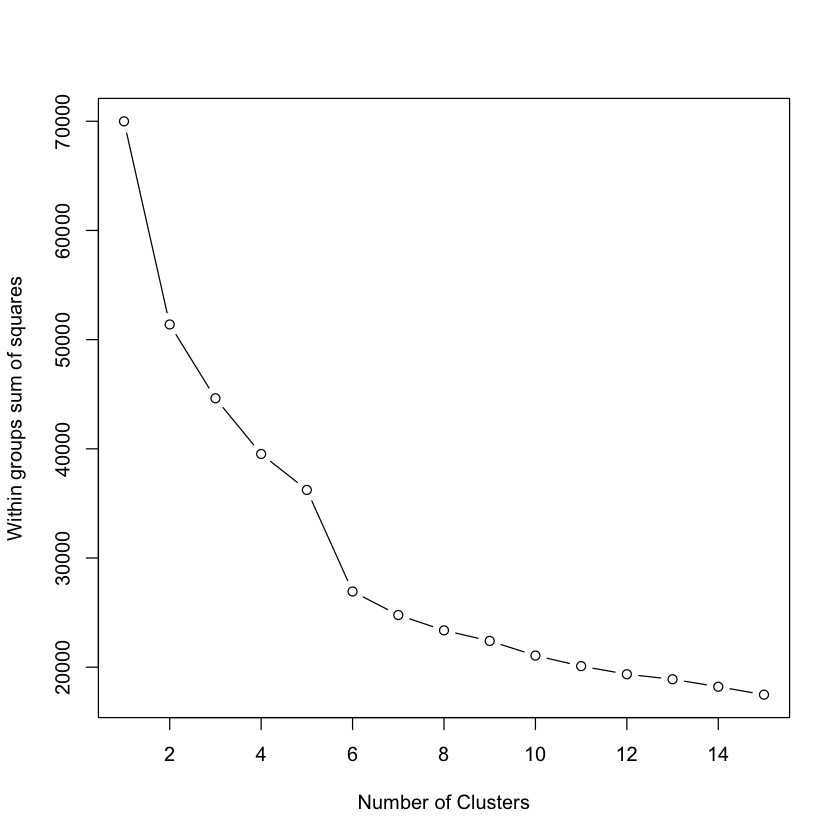

In [19]:
# Check for number of clusters
wssplot <- function(data, nc = 15, seed = 1234){
    wss <- (nrow(data) - 1) * sum(apply(data, 2, var))
    for (i in 2:nc) {
        set.seed(seed)
        wss[i] <- sum(kmeans(data, centers = i)$withinss)
    }
    par(bg = "white")
    plot(1:nc, wss, type="b", xlab="Number of Clusters",
    ylab="Within groups sum of squares")
}

wssplot(data.clustering)

#### NB Clust

In [20]:
# NB clust
nc <- NbClust(data.clustering, distance = "euclidean", min.nc=2, max.nc=15, method = "kmeans")
table(nc$Best.n[1, ])
barplot(table(nc$Best.n[1,]),xlab="Numer of Clusters", ylab="Number of Criteria", main="Number of Clusters Chosen")

#### K-Means with 4 Clusters

In [21]:
# Kmeans clustering
kmeans <- kmeans(data.clustering, centers = 4, nstart = 25)
kmeans$cluster

[1] 1 1 2 1 2 3 3 2 3 1 1 1 3 1 1 1 2 2 3 1 3 1 1 1 2 1 2 1 2 1 1 1 1 2 2 2
   [37] 1 1 3 1 2 1 3 2 2 1 1 2 1 3 2 1 2 2 1 1 3 2 3 1 2 1 3 2 1 1 1 1 2 3 1 1
   [73] 3 1 1 2 2 2 2 3 1 2 2 3 3 3 1 3 1 1 1 1 3 2 1 1 2 2 3 3 1 1 1 3 2 1 2 1
  [109] 2 3 1 3 2 4 2 1 1 2 1 3 2 3 3 1 2 2 2 2 2 3 3 3 3 4 3 1 2 1 3 3 2 3 1 3
  [145] 1 3 1 1 2 1 2 2 1 2 1 3 1 3 2 1 2 1 2 2 2 1 1 1 4 1 1 3 3 2 1 3 3 3 2 1
  [181] 1 2 1 3 3 2 2 1 3 1 1 2 3 3 1 3 3 3 2 3 2 2 1 3 3 3 3 1 3 1 1 1 3 2 3 2
  [217] 1 3 1 2 2 1 3 2 1 2 2 3 1 1 1 3 3 1 2 3 1 1 3 1 3 3 3 2 2 3 3 1 3 1 2 1
  [253] 2 3 1 2 1 1 1 2 1 3 3 1 1 1 1 1 1 2 1 1 3 3 1 3 2 2 2 3 3 3 2 1 1 1 2 1
  [289] 3 2 3 1 3 1 3 1 3 3 1 3 1 1 1 3 1 1 2 2 4 1 3 4 3 3 1 1 2 4 1 1 1 3 2 2
  [325] 1 1 1 2 1 1 3 1 2 1 1 2 3 1 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 2 3 3 1
  [361] 2 1 1 1 2 1 2 3 2 1 1 2 3 1 1 1 1 3 2 1 1 2 2 2 1 2 1 2 1 3 2 1 2 2 3 1
  [397] 4 2 3 3 1 1 1 1 2 2 1 1 3 1 2 1 2 1 1 2 3 2 1 3 1 1 1 1 1 1 3 2 3 1 1 2
  [433] 2 2 3 1 2 2 3 2 2 3 3 1 1 2 2 3 2 1 1 2 1 1 1 2 2 3 3 2 1 1 1 3 2 3 3 3
  [469] 1 2 1 2 3 1 1 3 1 2 1 1 2 2 1 1 4 2 2 1 1 2 1 2 1 3 2 2 3 3 1 3 3 2 4 2
  [505] 3 2 1 1 3 1 2 1 2 1 1 1 1 2 3 1 3 2 2 1 1 3 3 1 2 3 2 2 1 3 3 1 3 1 3 2
  [541] 2 3 2 1 2 3 2 1 2 1 1 2 3 3 3 2 1 3 3 3 1 1 2 1 3 1 1 1 3 3 1 1 3 1 1 3
  [577] 3 1 2 2 3 2 1 1 3 2 3 3 2 3 2 3 1 2 1 1 2 2 2 1 1 2 3 2 2 2 1 1 2 4 3 1
  [613] 1 2 3 3 3 3 1 1 2 2 1 2 3 2 1 2 3 1 1 1 1 1 1 1 1 2 1 1 2 3 2 1 1 2 1 1
  [649] 1 3 3 3 2 1 4 1 3 2 1 3 1 1 1 1 3 1 1 3 2 3 1 2 1 2 1 3 3 2 1 3 2 1 3 1
  [685] 1 1 2 3 1 1 1 3 3 1 2 1 2 2 2 3 1 1 3 3 2 1 3 1 1 2 1 1 3 2 3 2 3 3 3 2
  [721] 3 1 1 1 1 3 2 1 1 3 3 1 2 2 1 1 2 1 3 1 1 3 1 1 1 3 1 3 1 2 2 2 3 1 2 2
  [757] 1 1 3 3 3 2 2 3 2 2 2 3 3 1 2 1 1 1 1 3 1 1 3 2 1 1 2 3 1 3 3 2 2 2 1 3
  [793] 1 1 2 1 1 1 2 2 3 1 1 1 1 1 3 2 3 1 1 2 1 1 1 1 1 3 2 1 1 1 3 1 3 2 2 3
  [829] 1 2 1 1 2 1 1 1 2 2 3 1 3 3 3 1 1 3 3 1 1 1 3 2 2 1 1 1 2 3 3 2 3 1 3 2
  [865] 1 3 2 2 1 3 1 1 1 1 1 2 1 1 2 2 3 1 1 1 1 1 3 2 2 2 3 1 2 1 1 1 2 1 1 1
  [901] 2 1 1 2 1 1 1 3 3 1 2 3 1 2 2 2 1 3 3 2 1 3 1 2 2 3 2 1 2 2 3 3 1 1 2 3
  [937] 3 1 1 1 2 3 1 2 2 3 1 3 1 1 1 3 2 3 2 2 2 2 1 3 3 3 2 1 1 2 1 3 2 2 1 3
  [973] 1 1 1 1 3 2 1 1 1 1 3 3 1 1 1 2 1 3 1 3 1 1 1 3 1 1 1 1 2 1 1 2 1 1 1 1
 [1009] 1 2 2 3 2 3 1 3 1 3 3 1 1 1 2 1 1 3 1 1 3 2 2 1 1 2 1 3 3 1 4 1 1 1 1 3
 [1045] 3 1 3 2 3 1 1 3 2 2 2 2 3 3 2 1 2 1 1 1 2 1 2 3 4 3 3 1 1 1 2 1 1 1 2 3
 [1081] 1 1 2 1 1 3 1 2 3 1 1 1 2 2 1 3 3 3 1 1 2 2 1 2 3 1 1 1 2 1 1 2 3 1 3 2
 [1117] 3 1 2 2 3 1 1 3 2 1 1 3 1 3 2 3 2 2 2 3 1 1 1 1 2 2 2 3 2 1 1 4 2 2 2 4
 [1153] 3 1 2 1 3 2 1 2 2 2 1 1 1 2 1 1 3 2 1 3 2 2 1 3 2 2 2 1 1 3 3 3 2 1 3 3
 [1189] 1 3 2 1 1 1 1 1 1 1 2 2 3 1 2 3 4 3 1 1 3 3 1 2 3 1 3 2 1 2 1 3 2 2 1 1
 [1225] 2 1 1 3 1 1 1 1 1 2 3 1 3 1 3 3 2 2 3 2 2 3 1 1 1 3 3 3 3 1 1 2 3 2 2 3
 [1261] 3 3 2 1 2 3 2 1 1 3 2 3 3 2 1 3 3 1 2 3 1 1 3 3 3 2 2 3 2 2 2 1 1 1 1 2
 [1297] 1 3 3 1 2 3 1 3 3 1 2 2 3 3 3 1 2 2 3 1 1 3 1 2 3 2 2 2 1 4 2 2 3 3 2 1
 [1333] 2 3 1 1 4 1 3 1 1 1 3 3 3 1 3 2 3 2 1 2 1 3 2 3 2 1 3 2 1 2 2 3 3 1 2 2
 [1369] 3 2 1 1 1 1 2 1 2 3 2 1 3 1 2 2 3 2 3 1 1 2 2 3 1 1 2 2 2 1 1 1 1 2 1 1
 [1405] 2 1 3 1 2 3 2 1 2 2 2 3 3 1 1 1 3 1 3 3 1 3 3 3 3 1 3 1 3 1 3 1 2 1 3 2
 [1441] 3 1 1 1 3 1 1 3 3 4 1 2 2 3 1 4 2 3 2 3 2 2 3 1 2 1 1 1 2 1 3 2 1 2 1 1
 [1477] 2 2 1 1 2 1 1 1 2 2 2 3 3 1 3 2 1 2 3 1 1 1 3 1 1 1 1 2 2 3 1 1 2 2 2 1
 [1513] 1 1 2 1 1 1 2 1 3 1 1 1 3 3 1 2 2 2 1 2 2 1 4 3 1 1 1 1 2 2 1 1 2 1 3 1
 [1549] 2 3 1 2 3 2 1 3 2 1 3 2 1 3 2 1 1 1 1 2 2 2 1 1 3 1 3 1 2 1 3 1 1 1 1 3
 [1585] 3 1 1 2 3 1 1 2 2 3 1 3 3 1 3 2 1 1 1 2 1 3 1 2 1 1 3 2 3 1 2 1 1 2 2 1
 [1621] 1 3 3 2 1 1 3 3 2 3 2 2 1 2 3 2 1 1 3 1 1 3 3 2 3 1 1 1 1 1 3 1 2 3 1 3
 [1657] 2 3 3 2 1 1 1 3 3 2 1 1 1 1 1 1 1 2 1 3 2 3 1 1 1 3 3 3 3 2 3 3 1 1 2 1
 [1693] 2 1 1 1 1 1 3 1 1 2 2 1 1 3 1 3 2 4 1 3 1 3 3 2 1 2 2 3 2 1 1 2 1 1 1 2
 [1729] 2 3 1 1 1 1 1 1 2 1 1 1 1 1 2 2 3 1 1 1 2 1 3 1 1 3 1 2 1 1 2 3 1 2 1 1
 [1765] 3 3 1 1 3 1 1 2 3 3 1 3 1 4 2 2 1 3 2 2 3 3 1 2 2 1 2 1 1 1 3 3 3 1 3 3
 [18

#### Number of clusters using Hartingan's

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 500000)"
Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 500000)"


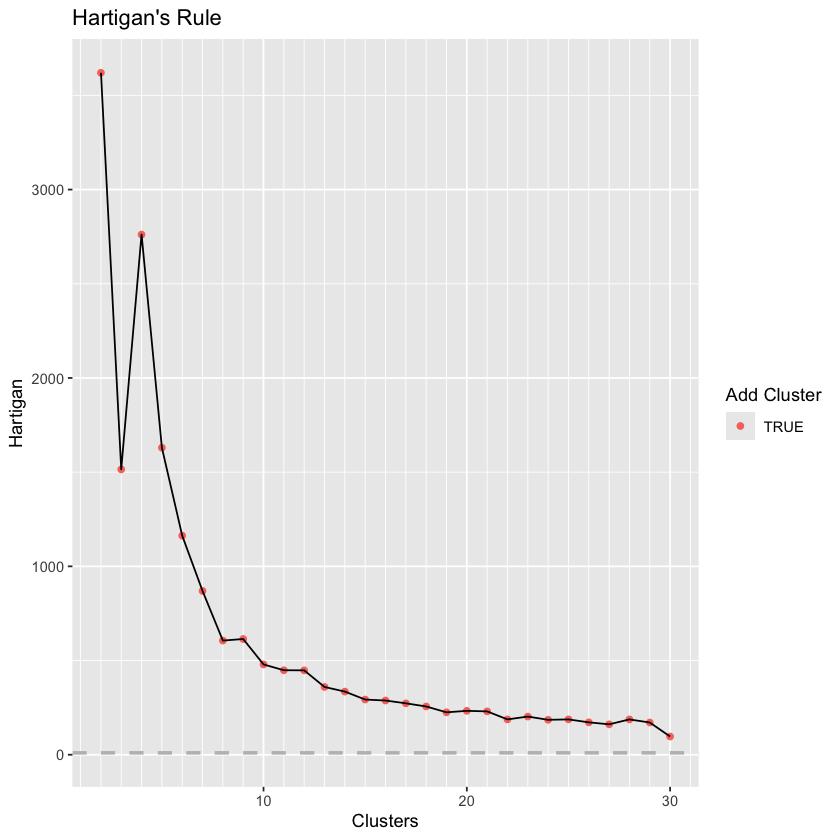

In [22]:
km <- FitKMeans(data.clustering, max.clusters = 30, nstart = 25, seed = 278613, iter.max = 25)
PlotHartigan(km)

### PCA Analysis

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.6554 1.0762 1.0034 0.9771 0.8517 0.64005 0.07101
Proportion of Variance 0.3915 0.1655 0.1438 0.1364 0.1036 0.05852 0.00072
Cumulative Proportion  0.3915 0.5569 0.7007 0.8371 0.9408 0.99928 1.00000

                              PC1        PC2         PC3        PC4        PC5
Temperature          -0.571653679  0.1332725  0.07592385 -0.1062751 -0.1829662
Apparent_Temperature -0.563235473  0.1860407  0.07710639 -0.1440995 -0.1706726
Humidity              0.476737200  0.1600673 -0.06352340 -0.2246420  0.1922484
Wind_Speed           -0.061237615 -0.7751945 -0.06728142  0.4608007 -0.2115579
Wind_Bearing         -0.042616192 -0.4594660 -0.38494343 -0.7866004 -0.0874114
Visibility           -0.350824370 -0.1138203 -0.25672723  0.1085623  0.8862553
Pressure             -0.007455967  0.3114727 -0.87500734  0.2731550 -0.2501776
                              PC6          PC7
Temperature          -0.314460560 -0.711357571
Apparent_Temperature -0.317044028  0.701283487
Humidity             -0.809518208 -0.017935447
Wind_Speed           -0.363129265  0.042893335
Wind_Bearing          0.111834085 -0.002357255
Visibility           -0.028657410  0.001698943
Pressure             -0.009324075 -0.00

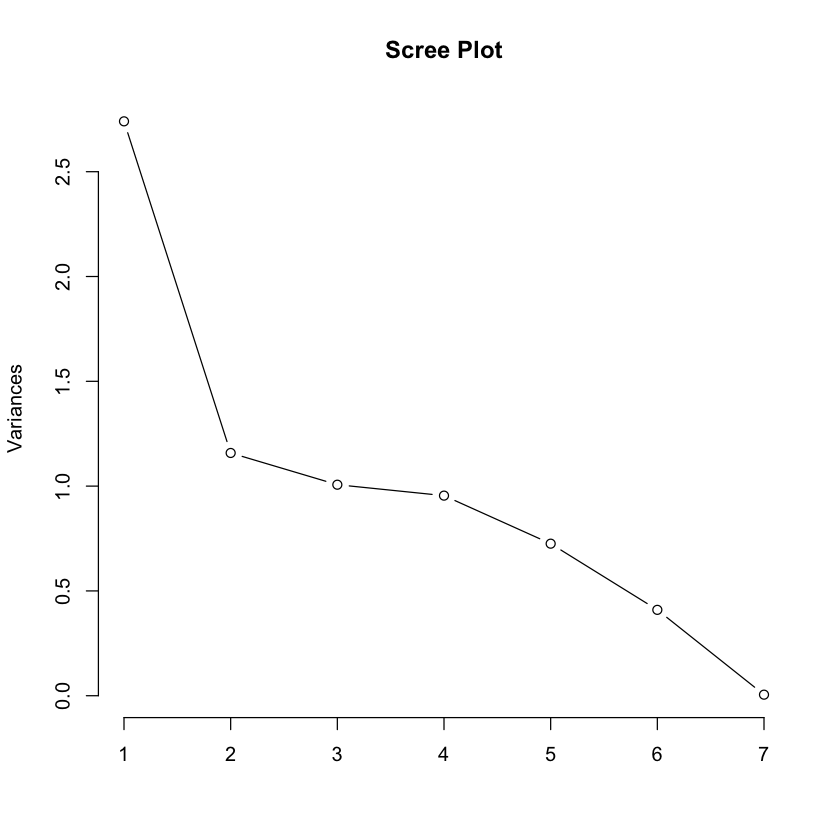

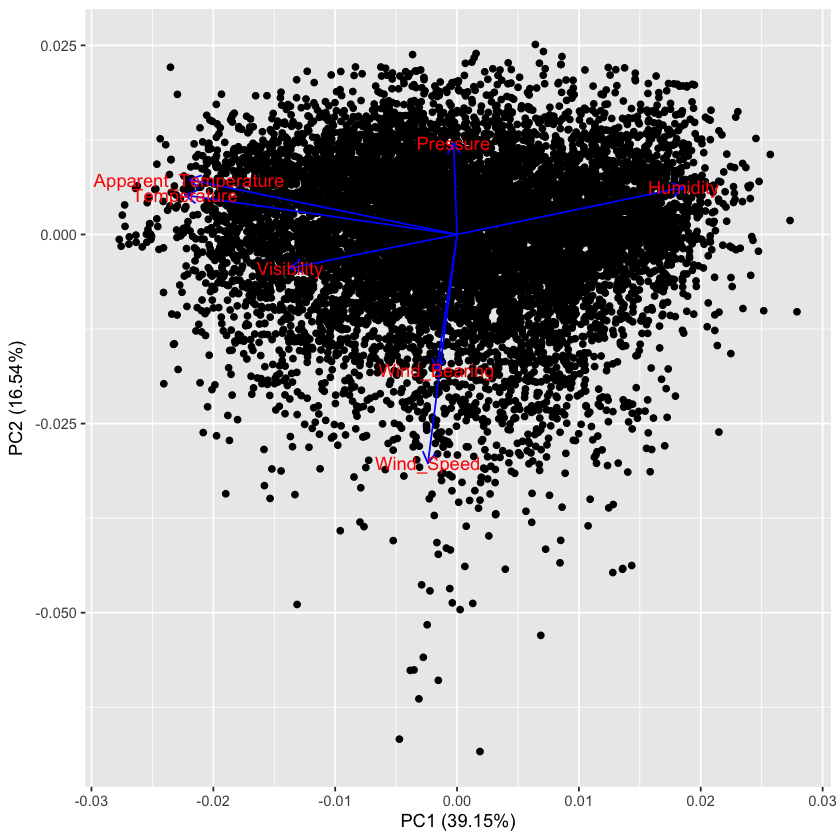

In [24]:
# PCA Analysis

# Removing non-numeric columns
data.pca <- data[, sapply(data, is.numeric)]

# Removing columns with zero variance
data.pca <- data.pca[, sapply(data.pca, function(x) var(x, na.rm = TRUE) != 0)]

# Removing rows with NA values
data.pca <- na.omit(data.pca)

# Scale the data: PCA is affected by scale so it is important to scale the variables to have unit variance
data.pca <- scale(data.pca)

# Perform PCA
pca_results <- prcomp(data.pca, center = TRUE, scale. = TRUE)

summary(pca_results)

# Plotting the variance explained by each principal component
par(bg = "white")
plot(pca_results, type = "lines", main = "Scree Plot")

loadings <- pca_results$rotation
print(loadings)

# Variance explained plots
autoplot(prcomp(data.pca), data = data, loadings = TRUE, loadings.label = TRUE, loadings.colour = 'blue')

### Factor Analysis

Factor Analysis using method =  minres
Call: fa(r = data.pca, nfactors = 4, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                       MR1   MR3   MR2   MR4    h2     u2 com
Temperature           0.99  0.10 -0.02  0.05 0.996 0.0041 1.0
Apparent_Temperature  0.99  0.10 -0.11  0.06 0.996 0.0043 1.1
Humidity             -0.62 -0.16 -0.30  0.06 0.507 0.4930 1.6
Wind_Speed            0.01  0.00  0.75  0.08 0.575 0.4251 1.0
Wind_Bearing          0.02  0.00  0.07  0.60 0.359 0.6413 1.0
Visibility            0.31  0.80  0.11  0.08 0.757 0.2428 1.4
Pressure             -0.01  0.09 -0.08 -0.02 0.015 0.9854 2.1

                       MR1  MR3  MR2  MR4
SS loadings           2.44 0.69 0.69 0.38
Proportion Var        0.35 0.10 0.10 0.05
Cumulative Var        0.35 0.45 0.55 0.60
Proportion Explained  0.58 0.17 0.16 0.09
Cumulative Proportion 0.58 0.75 0.91 1.00

Mean item complexity =  1.3
Test of the hypothesis that 4 factors are sufficient.

df

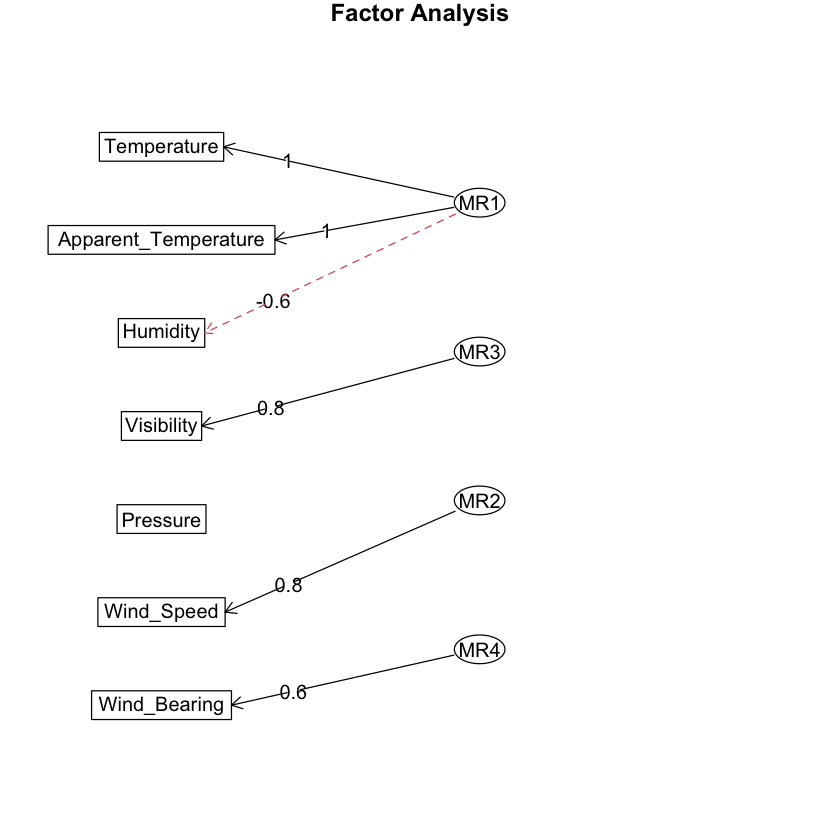

Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


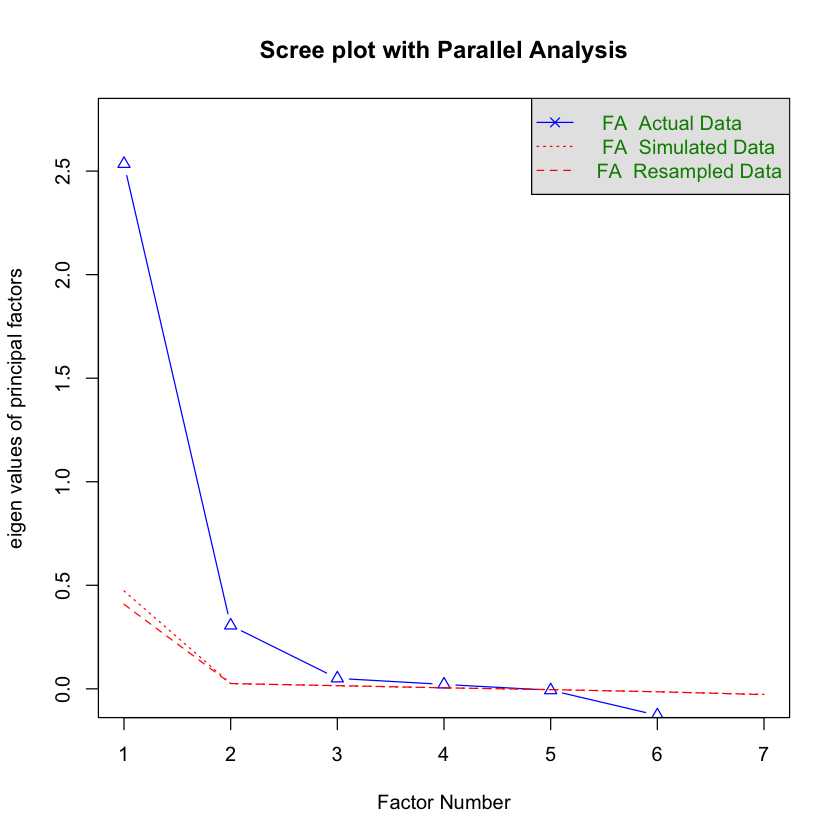

In [26]:
# Factor Analysis
fa <- fa(data.pca, nfactors = 4, rotate = "varimax")
print(fa)

par(bg = "white")

# Plotting the factor analysis
fa.diagram(fa)

# Parallel Analysis
fa.parallel(data.pca, fm = "ml", fa = "fa", n.iter = 100, show.legend = TRUE, main = "Scree plot with Parallel Analysis")

### Clustering on reduced data set with 2 and 3 dimensions

In [27]:
pc2 <- principal(data.pca, nfactors = 2, rotate = "varimax")
pc2

Principal Components Analysis
Call: principal(r = data.pca, nfactors = 2, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                       RC1   RC2   h2    u2 com
Temperature           0.95 -0.11 0.92 0.084 1.0
Apparent_Temperature  0.94 -0.17 0.91 0.091 1.1
Humidity             -0.78 -0.20 0.65 0.348 1.1
Wind_Speed            0.07  0.84 0.71 0.294 1.0
Wind_Bearing          0.05  0.50 0.25 0.751 1.0
Visibility            0.58  0.14 0.35 0.648 1.1
Pressure              0.02 -0.33 0.11 0.887 1.0

                       RC1  RC2
SS loadings           2.74 1.16
Proportion Var        0.39 0.17
Cumulative Var        0.39 0.56
Proportion Explained  0.70 0.30
Cumulative Proportion 0.70 1.00

Mean item complexity =  1.1
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.12 
 with the empirical chi square  6262.32  with prob <  0 

Fit based upon off diagonal values = 0.86

In [29]:
tail(pc2$scores)

,RC1,RC2
9995,-1.06129211,-0.006975473
9996,1.05380190,-0.207902123
9997,1.56970344,-0.498057316
9998,-1.41197852,0.027091494
9999,0.02119287,-0.271186322
10000,0.29356037,0.711333394


Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 500000)"


1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     4     2     1     2     3     3     2     3     1     1     4     3 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     3     1     4     4     3     4     3     3     4     1     1     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     4     2     1     3     4     3     4     2     2     1     1     4 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    1     1     1     3     2     2     4     4     2     1     3     2     3 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     2     1     2     3     2     3     1     1     1     3     2     1 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    1     1     1     2     3     4     1     3     4     1     2     1     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    1     3     1     2     2     3     3     3     4     1     4     3     1 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    1     3     2     4     1     1     4     4     3     1     1     1     3 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     1     2     4     2     3     4     3     2     4     1     1     3 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     1     3     1     3     3     1     4     2     2     2     2     3 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    3     3     1     4     1     4     1     1     3     3     2     3     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    3     1     3     4     4     2     4     2     2     1     2     1     3 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    4     3     2     1     4     4     2     1     1     4     4     1     4 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    1     4     3     1     2     4     3     3     4     4     4     1     1 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    3     3     3     2     2     2     1     1     1     2     3     4     1 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    3     4     3     1     3     4     1     3     3     3     3     3     4 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    3     1     1     1     3     2     3     2     4     3     4     1     2 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    1     3     2     1     2     2     3     2     4     1     3     3     4 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    2     3     1     2     3     1     3     3     3     2     4     3     1 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    4     3     3     4     1     4     3     1     2     1     1     1     1 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    4     3     3     4     1     2     1     1     4     1     1     4     3 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    3     2     3     2     2     2     3     3     3     2     1     1     4 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    2     2     3     4     1     1     3     1     3     3     3     4     1 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    1     4     1     1     4     3     1     2     2     4     4     3     4 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    3     3     4     4     2     4     1     1     3     3     2     2     1 
  326   327   328   329   330   331   332   333   334 

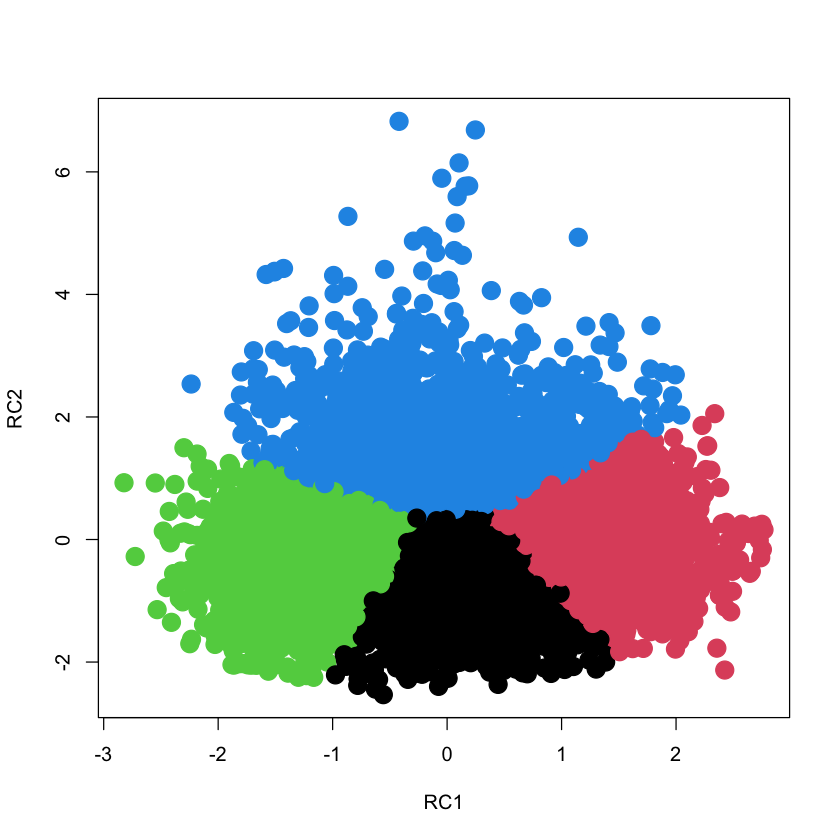

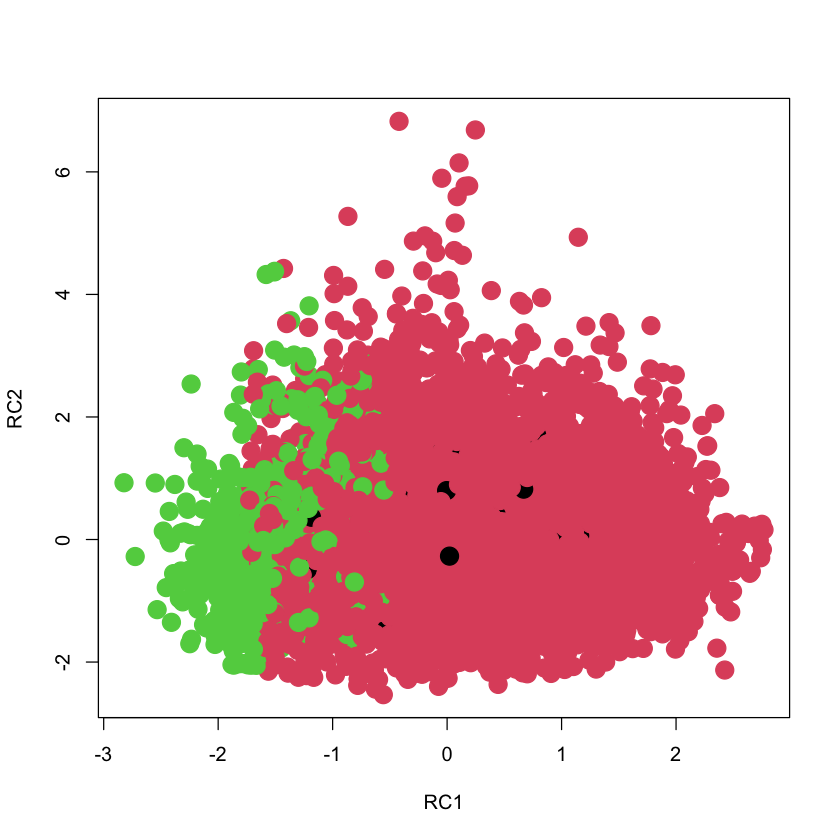

In [30]:
km <- kmeans(pc2$scores, centers = 4, nstart = 25)
km$cluster

par(bg = "white")

# plot the clusters
plot(pc2$scores, col = km$cluster, pch = 19, cex = 2)

# plot with color by precip type
plot(pc2$scores, col = as.numeric(as.factor(data$Precip.Type)), pch = 19, cex = 2)

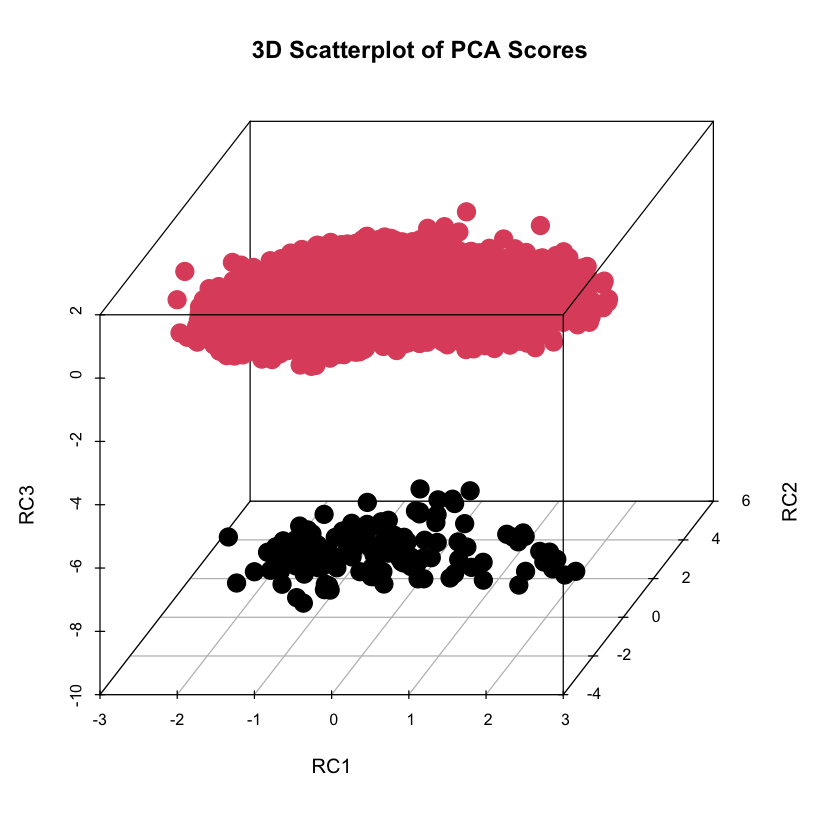

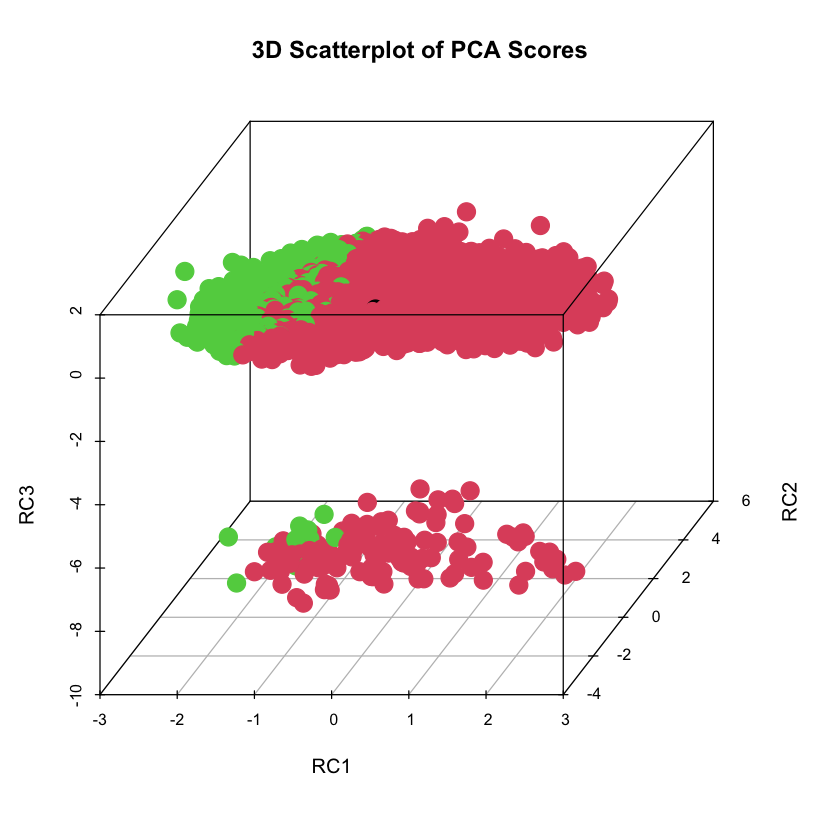

In [39]:
pc3 <- principal(data.pca, nfactors = 3, rotate = "varimax")
km3 <- kmeans(pc3$scores, centers = 2, nstart = 25)

par(bg = "white")

scatterplot3d(pc3$scores, color=km3$cluster, angle = 55, pch = 19, cex.symbols = 2, main = "3D Scatterplot of PCA Scores")

# 3d plot with color as precipitation type
scatterplot3d(pc3$scores, color = as.numeric(as.factor(data$Precip.Type)), angle = 55, pch = 19, cex.symbols = 2, main = "3D Scatterplot of PCA Scores")

### Correlation Matrix

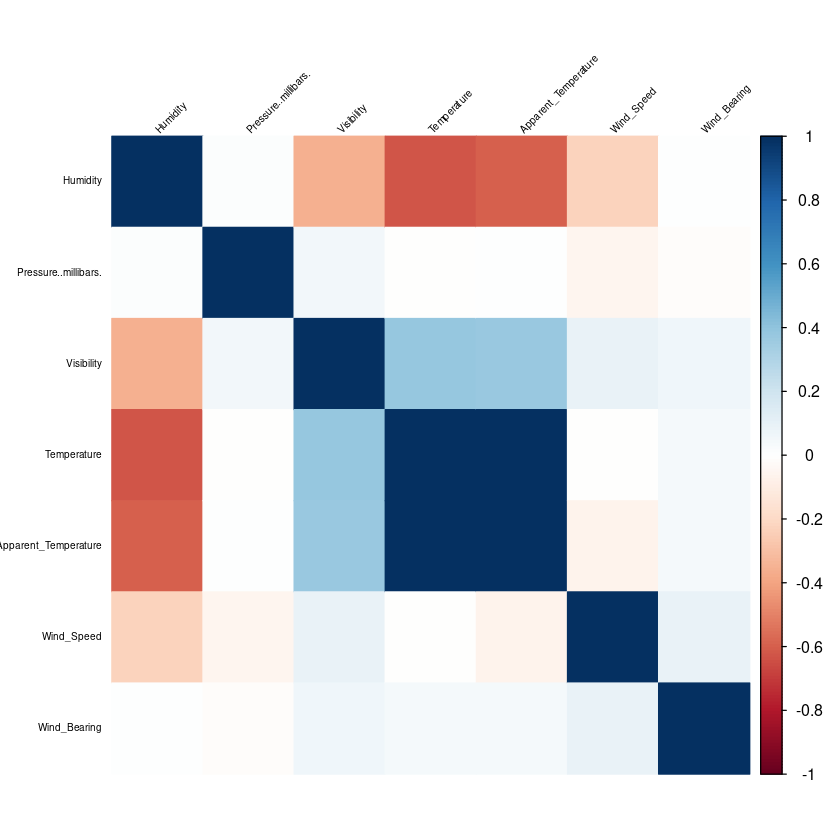

In [30]:
# correlation matrix
correlation_matrix <- cor(data[, sapply(data, is.numeric)])

# plot the correlation matrix
corrplot(correlation_matrix, method = "color", order = "hclust", tl.cex = 0.5, tl.col = "black", tl.srt = 45)